In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\viswa\DATA SCIENCE AND MACHINE LEARNING BY NARESH IT\EDA_PYTHON\EDA PRACTICE WITH DIFF DATASETS\DATASETS\loan by analytics vidya\test_lAUu6dG.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [3]:
data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [4]:
data_gender=data['Gender'].mode().values[0]
data['Gender']=data['Gender'].fillna(data_gender)
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [5]:
data_Dependents=data['Dependents'].mode().values[0]
data['Dependents']=data['Dependents'].fillna(data_Dependents)
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [6]:
data_Self_Employed=data['Self_Employed'].mode().values[0]
data['Self_Employed']=data['Self_Employed'].fillna(data_Self_Employed)
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
cat_cols=data.select_dtypes(include='object').columns
val_cols=data.select_dtypes(exclude='object').columns

In [8]:
cat_cols,val_cols

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'Property_Area'],
       dtype='object'),
 Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History'],
       dtype='object'))

In [9]:
loan_amount=data['LoanAmount'].mean()
data['LoanAmount']=data['LoanAmount'].fillna(loan_amount)
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
lo_mean=data['Loan_Amount_Term'].mode().values[0]
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(lo_mean)
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('object')


data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [11]:
cred_mean=data['Credit_History'].mode().values[0]
data['Credit_History']=data['Credit_History'].fillna(cred_mean)
data['Credit_History']=data['Credit_History'].astype('object')

data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [12]:
data['Dependents'].value_counts()

Dependents
0     210
2      59
1      58
3+     40
Name: count, dtype: int64

In [13]:
l=[]
for i in data['Dependents']:
    if i=='3+':
        l.append(4)
    else:
        l.append(i)
data['Dependents']=l
data['Dependents'].value_counts()

Dependents
0    210
2     59
1     58
4     40
Name: count, dtype: int64

In [14]:
cat_cols=data.select_dtypes(include='object').columns
val_cols=data.select_dtypes(exclude='object').columns

# how to check the Outliers

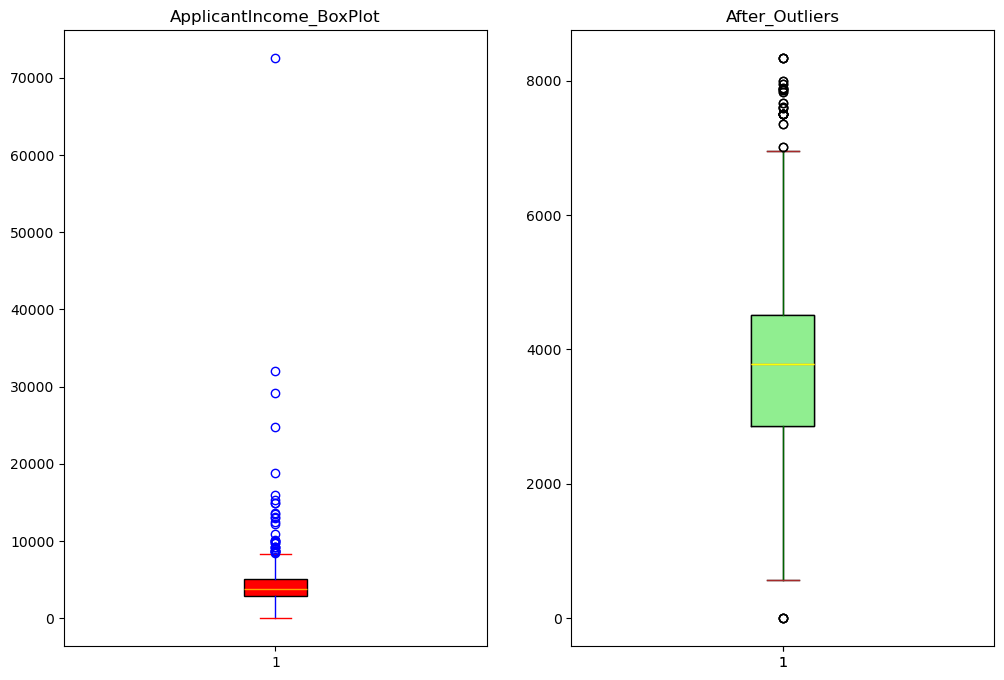

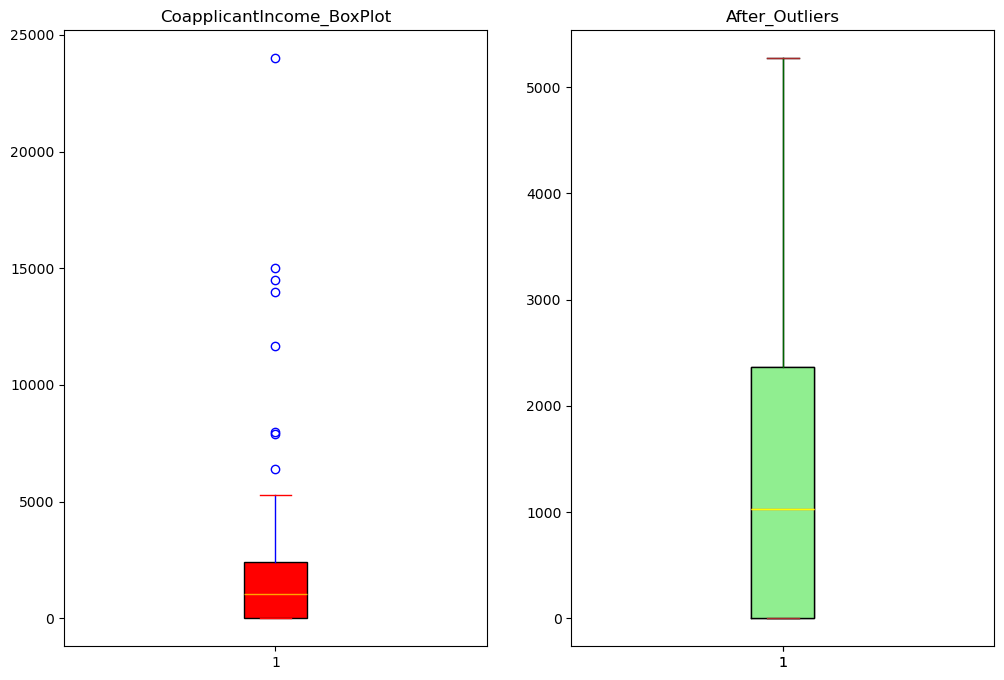

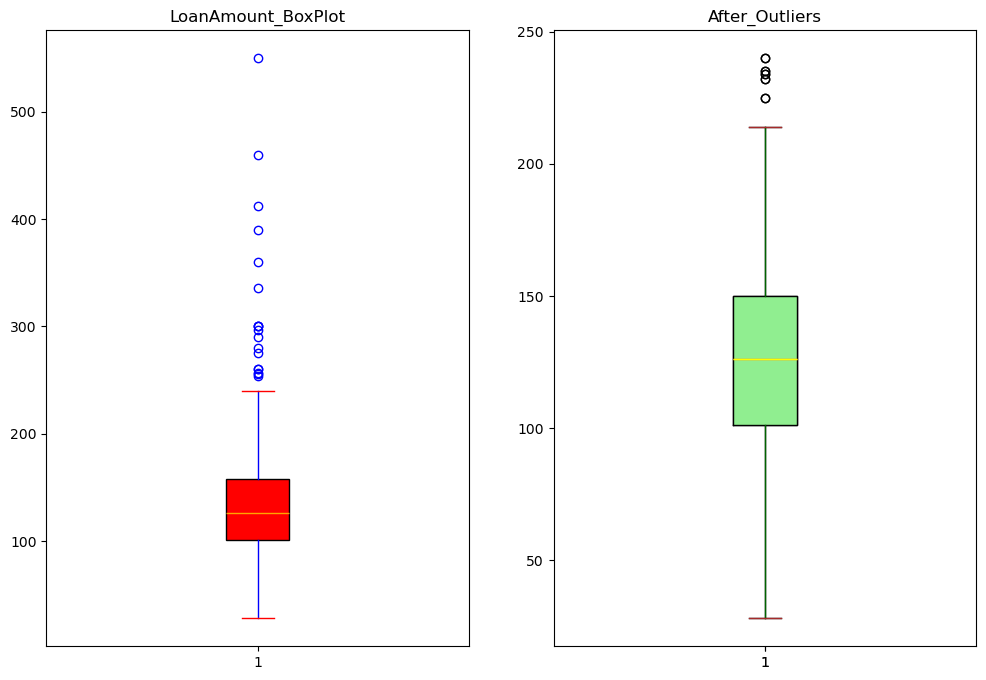

In [15]:
for i in val_cols:
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    box1=plt.boxplot(data[i],patch_artist=True)
    plt.setp(box1["boxes"], facecolor="red")       # Box color
    plt.setp(box1["whiskers"], color="blue")          # Whisker color
    plt.setp(box1["caps"], color="red")               # Cap color
    plt.setp(box1["medians"], color="orange")         # Median color
    plt.setp(box1["fliers"], markeredgecolor="blue")
    plt.title(f'{i}_BoxPlot')
    plt.subplot(1,2,2)
    q1=np.percentile(data[i],q=25)
    q3=np.quantile(data[i],q=0.75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    con=(data[i] <lb) | (data[i]>ub)
    true=np.median(data[i])
    false=data[i]
    q=np.where(con,true,false)
    data[i]=q
    plt.boxplot(q)
    box2 = plt.boxplot(q, patch_artist=True)  # Enable color fill
    plt.setp(box2["boxes"], facecolor="lightgreen")  # Box color
    plt.setp(box2["whiskers"], color="darkgreen")    # Whisker color
    plt.setp(box2["caps"], color="brown")            # Cap color
    plt.setp(box2["medians"], color="yellow")           # Median color
    plt.setp(box2["fliers"], markeredgecolor="black")  # Outlier color
    plt.title('After_Outliers')
    plt.show()

## STANADARDIZATION

In [16]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i in val_cols:
    data[i]=ss.fit_transform(data[[i]])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,1.273228,-0.913558,-0.414100,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,-0.518052,0.128213,-0.010292,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,0.785436,0.336567,2.059224,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,-1.016683,0.854674,-0.666480,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,-0.382554,-0.913558,-1.221716,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,4,Not Graduate,Yes,0.114045,0.320593,-0.338386,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,0.214991,-0.421148,-0.287910,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,-0.400169,0.470608,-0.010292,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,0.785436,0.748413,0.797324,360.0,1.0,Rural


## LABEL ENCODER

In [17]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in cat_cols:
    data[i]=lb.fit_transform(data[i].astype(str))
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,1.273228,-0.913558,-0.414100,7,1,2
1,1,1,1,1,0,0,-0.518052,0.128213,-0.010292,7,1,2
2,2,1,1,2,0,0,0.785436,0.336567,2.059224,7,1,2
3,3,1,1,2,0,0,-1.016683,0.854674,-0.666480,7,1,2
4,4,1,0,0,1,0,-0.382554,-0.913558,-1.221716,7,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1,1,3,1,1,0.114045,0.320593,-0.338386,7,1,2
363,363,1,1,0,0,0,0.214991,-0.421148,-0.287910,7,1,2
364,364,1,0,0,0,0,-0.400169,0.470608,-0.010292,7,1,1
365,365,1,1,0,0,0,0.785436,0.748413,0.797324,7,1,0


In [18]:
data.drop('Loan_ID',axis=1,inplace=True)

In [19]:
data.to_csv('test_data.csv',index=False)

In [20]:
data_df=pd.read_csv('test_data.csv')
data_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,1.273228,-0.913558,-0.414100,7,1,2
1,1,1,1,0,0,-0.518052,0.128213,-0.010292,7,1,2
2,1,1,2,0,0,0.785436,0.336567,2.059224,7,1,2
3,1,1,2,0,0,-1.016683,0.854674,-0.666480,7,1,2
4,1,0,0,1,0,-0.382554,-0.913558,-1.221716,7,1,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,0.114045,0.320593,-0.338386,7,1,2
363,1,1,0,0,0,0.214991,-0.421148,-0.287910,7,1,2
364,1,0,0,0,0,-0.400169,0.470608,-0.010292,7,1,1
365,1,1,0,0,0,0.785436,0.748413,0.797324,7,1,0


In [21]:
import pickle
model_train=pickle.load(open('prediction_model.pkl','rb'))
model_train

LogisticRegression()

In [22]:
pred=model_train.predict(data_df)
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [23]:
data=pd.read_csv(r"C:\Users\viswa\DATA SCIENCE AND MACHINE LEARNING BY NARESH IT\EDA_PYTHON\EDA PRACTICE WITH DIFF DATASETS\DATASETS\loan by analytics vidya\test_lAUu6dG.csv")

In [24]:
sub=pd.DataFrame()
sub['Loan_ID']=data['Loan_ID']
sub['Prediction']=pred
sub

,Loan_ID,Prediction
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [25]:
k=[]
for i in sub['Prediction']:
    if i==1:
        k.append('Y')
    else:
        k.append('N')
sub['Prediction']=k
sub

,Loan_ID,Prediction
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [26]:
sub['Prediction'].value_counts()

Prediction
Y    308
N     59
Name: count, dtype: int64